# The _EUV Snapshot Imaging Spectrograph_

_Roy T. Smart, Charles C. Kankelborg, and Jacob D. Parker_

In [1]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

In [2]:
import warnings
import matplotlib.pyplot as plt
import matplotlib.colors
import astropy.units as u
import pandas
import IPython.display
from kgpy import vector, optics, format as fmt
import esis.optics

In [3]:
warnings.filterwarnings('ignore')
pandas.set_option('display.max_colwidth', -1)

In [4]:
esis_optics_small = esis.optics.design.final(
    pupil_samples=5, 
    field_samples=5,
)
%time raytrace_small = esis_optics_small.system.raytrace

Wall time: 480 ms


In [5]:
esis_optics = esis.optics.design.final(
    pupil_samples=100, 
    field_samples=40,
)
%time raytrace = esis_optics.system.raytrace

Wall time: 5min 39s


## Optical Layout

<IPython.core.display.Javascript object>


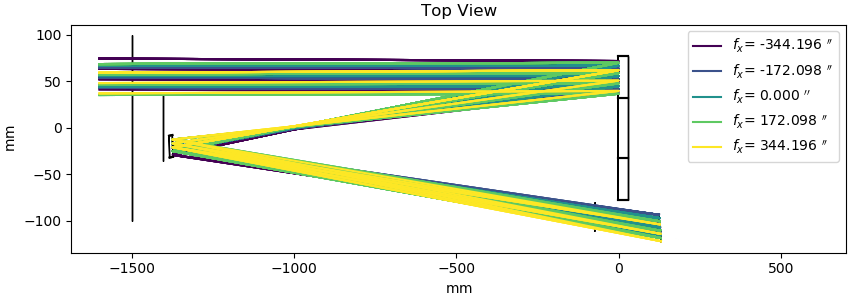

In [6]:
color_axis = optics.Rays.axis.field_x
fig_layout, ax_layout = plt.subplots(figsize=(8.5, 3), constrained_layout=True)
esis_optics_small.system.plot(
    ax=ax_layout, 
    components=(vector.iz, vector.ix),
    color_axis=color_axis,
)
_ = ax_layout.set_title('Top View')
_ = ax_layout.set_xlim(right=700 * u.mm)

## Distortion

In [7]:
rays = esis_optics.system.rays_output.copy()
rays.position = rays.position / esis_optics.components.detector.pixel_width.to(u.mm) * u.pix

,$C_{ }$,$C_{\lambda }$,$C_{ x }$,$C_{ y }$,$C_{\lambda\lambda }$,$C_{\lambda x }$,$C_{ xx }$,$C_{\lambda y }$,$C_{ x y }$,$C_{ yy }$
$x'$,-15715.209 $\mathrm{pix}$,24.175 $\mathrm{\frac{pix}{\mathring{A}}}$,1.204 $\mathrm{\frac{pix}{{}^{\prime\prime}}}$,-0.000 $\mathrm{\frac{pix}{{}^{\prime\prime}}}$,2.453e-03 $\mathrm{\frac{pix}{\mathring{A}^{2}}}$,"2.522e-04 $\mathrm{\frac{pix}{\mathring{A}\,{}^{\prime\prime}}}$",6.916e-06 $\mathrm{\frac{pix}{arcsec^{2}}}$,"4.668e-14 $\mathrm{\frac{pix}{\mathring{A}\,{}^{\prime\prime}}}$",-7.234e-16 $\mathrm{\frac{pix}{arcsec^{2}}}$,2.072e-06 $\mathrm{\frac{pix}{arcsec^{2}}}$
$y'$,-0.000 $\mathrm{pix}$,0.000 $\mathrm{\frac{pix}{\mathring{A}}}$,-0.000 $\mathrm{\frac{pix}{{}^{\prime\prime}}}$,-1.239 $\mathrm{\frac{pix}{{}^{\prime\prime}}}$,-5.541e-15 $\mathrm{\frac{pix}{\mathring{A}^{2}}}$,"2.879e-15 $\mathrm{\frac{pix}{\mathring{A}\,{}^{\prime\prime}}}$",-1.054e-16 $\mathrm{\frac{pix}{arcsec^{2}}}$,"-9.372e-05 $\mathrm{\frac{pix}{\mathring{A}\,{}^{\prime\prime}}}$",-4.398e-06 $\mathrm{\frac{pix}{arcsec^{2}}}$,2.259e-15 $\mathrm{\frac{pix}{arcsec^{2}}}$


<IPython.core.display.Javascript object>


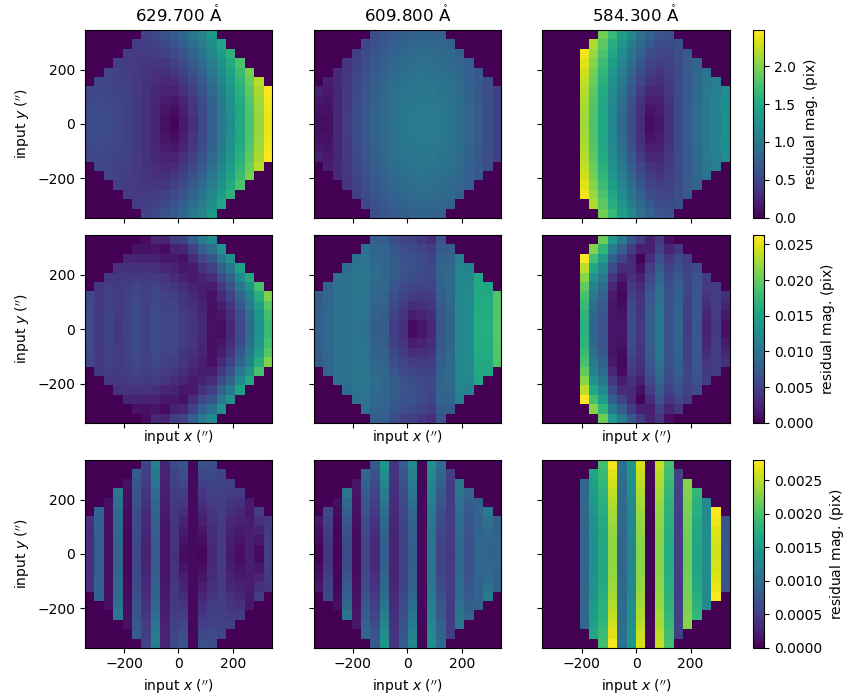

In [8]:
IPython.display.display(rays.distortion(2).model().dataframe)
fig_dist_res, axs_dist_res = plt.subplots(nrows=3, ncols=3, figsize=(8.5, 7), sharex=True, sharey=True, constrained_layout=True)
_ = rays.distortion(1).plot_residual(axs=axs_dist_res[0], use_xlabels=False)
_ = rays.distortion(2).plot_residual(axs=axs_dist_res[1], use_titles=False, use_xlabels=True)
_ = rays.distortion(3).plot_residual(axs=axs_dist_res[2], use_titles=False)

,$C_{ }$,$C_{\lambda }$,$C_{ x' }$,$C_{ y' }$,$C_{\lambda\lambda }$,$C_{\lambda x' }$,$C_{ x'x' }$,$C_{\lambda y' }$,$C_{ x' y' }$,$C_{ y'y' }$
$x$,12202.145 $\mathrm{{}^{\prime\prime}}$,-19.862 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}}}$,0.729 $\mathrm{\frac{{}^{\prime\prime}}{pix}}$,-0.000 $\mathrm{\frac{{}^{\prime\prime}}{pix}}$,-1.220e-04 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}^{2}}}$,"1.275e-05 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}\,pix}}$",-2.753e-06 $\mathrm{\frac{{}^{\prime\prime}}{pix^{2}}}$,"3.138e-14 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}\,pix}}$",1.706e-16 $\mathrm{\frac{{}^{\prime\prime}}{pix^{2}}}$,-9.087e-07 $\mathrm{\frac{{}^{\prime\prime}}{pix^{2}}}$
$y$,-0.000 $\mathrm{{}^{\prime\prime}}$,0.000 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}}}$,-0.000 $\mathrm{\frac{{}^{\prime\prime}}{pix}}$,-0.773 $\mathrm{\frac{{}^{\prime\prime}}{pix}}$,-1.592e-13 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}^{2}}}$,"9.431e-15 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}\,pix}}$",-5.755e-17 $\mathrm{\frac{{}^{\prime\prime}}{pix^{2}}}$,"3.453e-06 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}\,pix}}$",1.927e-06 $\mathrm{\frac{{}^{\prime\prime}}{pix^{2}}}$,1.112e-15 $\mathrm{\frac{{}^{\prime\prime}}{pix^{2}}}$


<IPython.core.display.Javascript object>


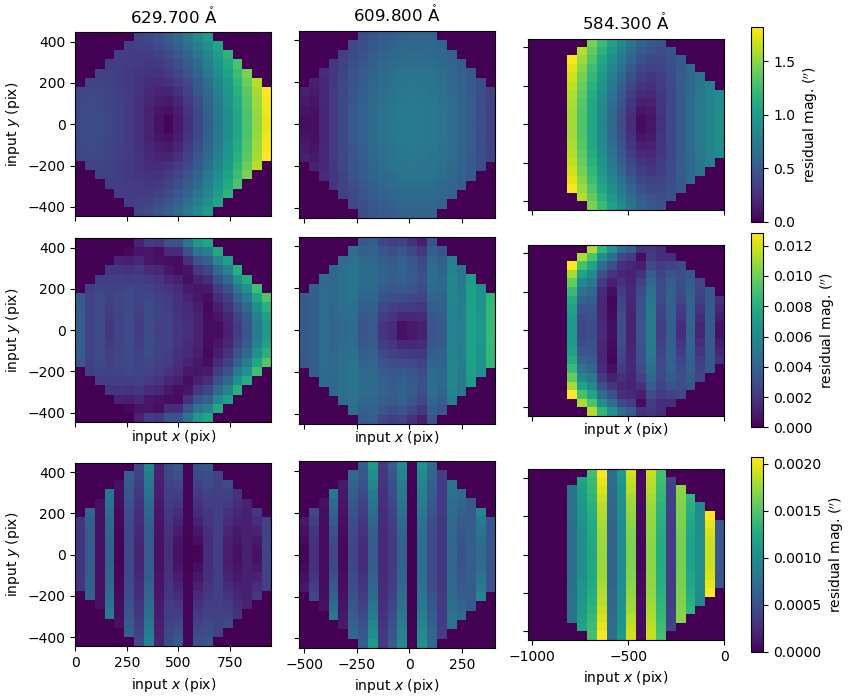

In [9]:
IPython.display.display(rays.distortion(2).model(inverse=True).dataframe)
fig_dist_ires, axs_dist_ires = plt.subplots(nrows=3, ncols=3, figsize=(8.5, 7), sharex='col', sharey=True, constrained_layout=True)
_ = rays.distortion(1).plot_residual(axs=axs_dist_ires[0], inverse=True, use_xlabels=False)
_ = rays.distortion(2).plot_residual(axs=axs_dist_ires[1], inverse=True, use_titles=False)
_ = rays.distortion(3).plot_residual(axs=axs_dist_ires[2], inverse=True, use_titles=False)